In [152]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.colors import LinearSegmentedColormap
import netCDF4 as nc
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapefile as shp
from datetime import date, timedelta
from descartes import PolygonPatch

In [124]:
with h5py.File("data/mcmc_save_data.hdf5", "r") as fp:
    samples = fp['samples'][:, :]
    objectives = fp['objectives'][:]

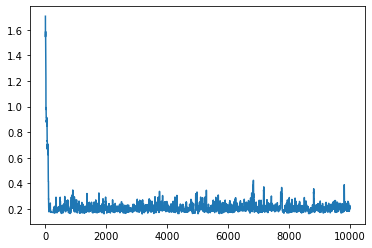

In [125]:
plt.plot(objectives)

In [126]:
true_particle_lon = -88.365997
true_particle_lat = 28.736628
# Starting particle release location
particle_lon = -87.8
particle_lat = 29.2

In [137]:
cmap_nodes = [0.0, 1.0]
# cmap_colors = [(232 / 255, 117 / 255, 0, 0.0), (232 / 255, 117 / 255, 0, 1.0)]
cmap_colors = [(1.00, 0.325, 0.286, 0.0), (1.00, 0.325, 0.286, 1.0)]

my_cmap = LinearSegmentedColormap.from_list("mycmap", cmap_colors)

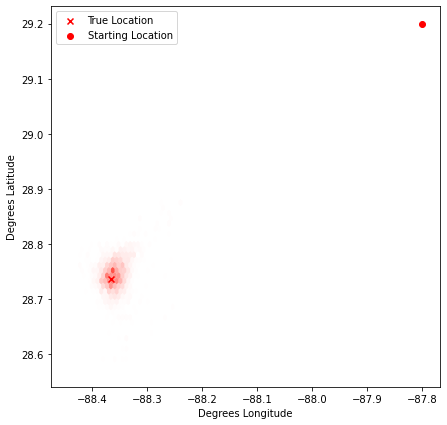

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7)) 

im = ax.hexbin(samples[500:, 1], samples[500:, 0], zorder=0, gridsize=30, cmap=my_cmap, edgecolor=None);
ax.scatter(true_particle_lon, true_particle_lat, color='red', marker='x', zorder=10, label='True Location')
ax.scatter(particle_lon, particle_lat, color='red', zorder=10, label='Starting Location')
ax.set_aspect('equal')
ax.legend()
ax.set_xlabel('Degrees Longitude')
ax.set_ylabel('Degrees Latitude')

# fig.colorbar(im);

fig.savefig('source_probability.png', dpi=300)

In [130]:
with nc.Dataset('data/hycom_gomu_501_2010042000_t000.nc') as ds:
    shape = (ds['lat'].shape[0], ds['lon'].shape[0])
    lon = np.array(ds['lon'][:])
    lat = np.array(ds['lat'][:])

lon[1] - lon[0]

0.03997802734375

In [150]:
shp_start_date = date(2010, 6, 13)

shapes = []

for i in range(1):
    current_date = shp_start_date + timedelta(days=i)
    
    with shp.Reader("data/shapefiles/S_{}_{}.shp".format(current_date.month, current_date.day)) as sf:
        shapes.append({
            'date': current_date,
            'shape_records': sf.shapeRecords()
        })

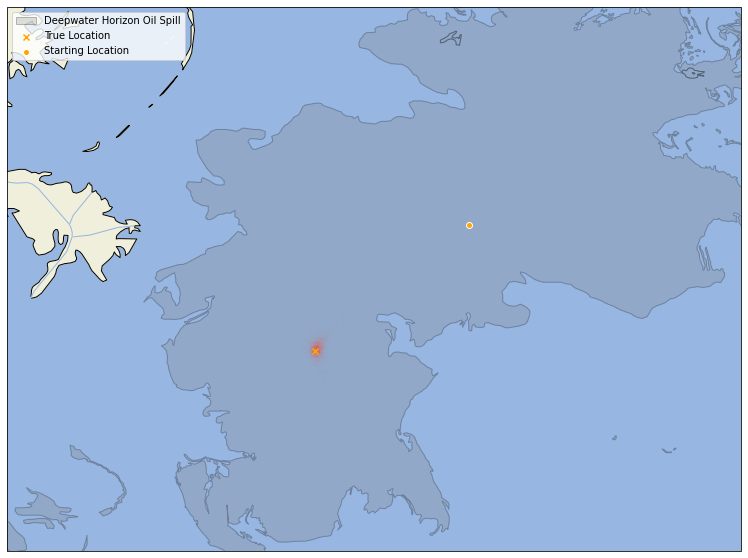

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}) 

im = ax.hexbin(samples[400:, 1], samples[400:, 0], zorder=0, gridsize=20, cmap=my_cmap, edgecolor=None);
ax.scatter(true_particle_lon, true_particle_lat, color='orange', marker='x', zorder=10, label='True Location')
ax.scatter(particle_lon, particle_lat, color='orange', ec='white', zorder=10, label='Starting Location')
ax.set_aspect('equal')
ax.set_xlabel('Degrees Longitude')
ax.set_ylabel('Degrees Latitude')
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.set_xlim(-89.5, -86.8)
ax.set_ylim(28, 30)

for i, shape in enumerate(shapes[0]['shape_records']):
    poly = shape.__geo_interface__['geometry']
    if i == 0:
        ax.add_patch(PolygonPatch(poly, ec='black', fc='gray', alpha=0.25, label='Deepwater Horizon Oil Spill'))
    else:
        ax.add_patch(PolygonPatch(poly, ec='black', fc='gray', alpha=0.25))

ax.legend()

# fig.colorbar(im);

fig.savefig('source_probability_without_burnin_with_map.png', dpi=300)